<a href="https://colab.research.google.com/github/Gcango/Analise_e_Avaliacao_curso_da_Udemy/blob/main/Analise_Avalia%C3%A7ao_UdemyCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste projecto de analise de dados, foi possivel analisar dados referentes aos cursos ministrados na UDEMY. Esses dados estão de igual forma disponivel no Kaggle, serviram para responder questões pertinentes sobre os cursos. Foi feita uma análise descritiva dos dados, e questões foram colocadas e respondidas ao longo do documento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dados = pd.read_csv("/content/Udemy_Courses.csv", parse_dates=['published_timestamp'])

In [6]:
dados.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments


In [7]:
dados.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [ ]:
#1) - Qual é a Quantidade de Linhas e Colunas do Dataset?

In [8]:
print(f"Este dataset possui num total {dados.shape[0]} linhas e {dados.shape[1]} colunas ")

Este dataset possui num total 3682 linhas e 11 colunas 


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   object             
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 291.4+ KB


In [10]:
#Verificação de possivel existência de Valores Nulos
dados.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

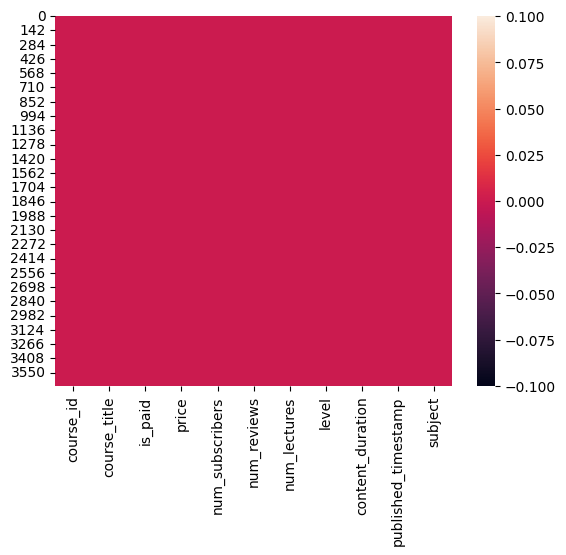

In [11]:
#Ver de forma gráfica a existência dos Valores nulos
sns.heatmap(dados.isnull());

In [12]:
#Vericação de duplicados no dataset
dados.duplicated().any()

True

In [13]:
dados = dados.drop_duplicates()

In [14]:
dados.duplicated().any()

False

In [ ]:
#2) - Descubra a Quantidade de Cursos disponiveis neste dataset?

In [15]:
dados.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [19]:
qtd_curso = dados['subject'].value_counts()
print(f"Neste dataset estão presentes os seguintes Cursos: \n{qtd_curso}")

Neste dataset estão presentes os seguintes Cursos: 
Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64


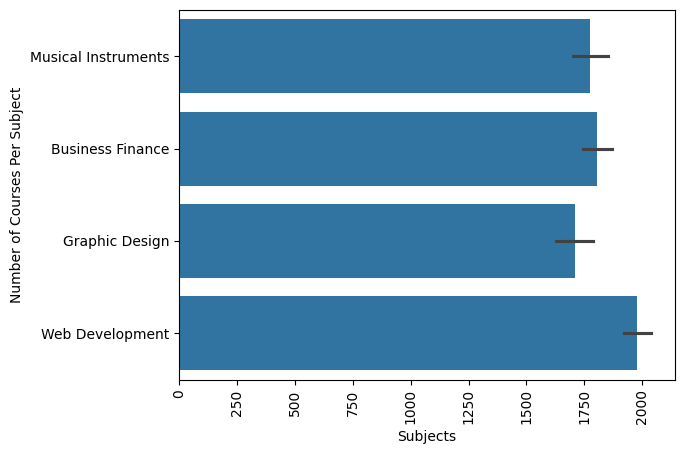

In [38]:
sns.barplot(dados['subject'])
plt.xlabel("Subjects")
plt.ylabel("Number of Courses Per Subject")
plt.xticks(rotation=90)
plt.show()

In [39]:
#3) - Para quais níveis os Cursos da Udemy são oferecidos?

In [42]:
cursos = dados['level'].value_counts()
print(f"Os níveis dos cursos ministrados na Udeny de acordo como o dataset são: \n{cursos}")

Os níveis dos cursos ministrados na Udeny de acordo como o dataset são: 
All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64


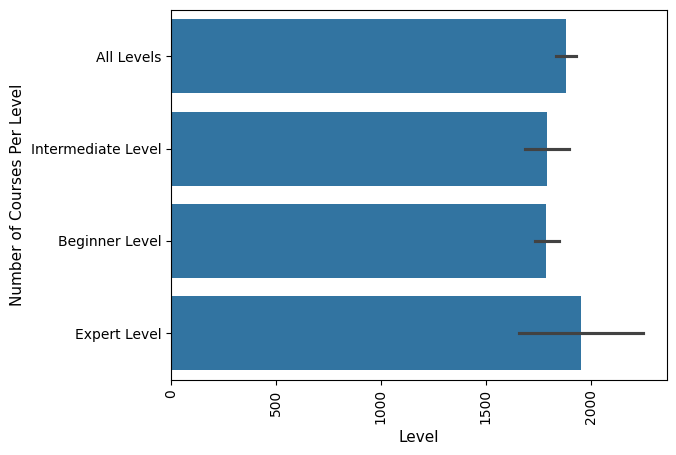

In [41]:
sns.barplot(dados['level'])
plt.xlabel("Level", fontsize=11)
plt.ylabel("Number of Courses Per Level",fontsize=11)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#4) - Enumera os Cursos Gratis e Pagos disponiveis no UDEME?

In [47]:
gratis_pago = dados['is_paid'].value_counts()
print(f" No que concerne aos cursos eles estão distribuidos em {gratis_pago[0]} Pagos e {gratis_pago[1]} Gratis")

 No que concerne aos cursos eles estão distribuidos em 3366 Pagos e 310 Gratis


In [ ]:
#5) - Quais cursos oferecem mais aulas gratuitas?

In [ ]:
dados.groupby('is_paid')['num_lectur']